### MidTerm Assignment: notebook 3: Learning to drive (Total: 15pts)


<p><font color='red'><b>Given date : March 30</b></font></p>

<font color='red'><b>Due date : April 17</b></font>


In this notebook, we will use [the Keras API](https://keras.io/) to build and train a convolutional neural network to discriminate between four types of road signs. To simplify we will consider the detection of 4 different signs: 

- A '30 km/h' sign (folder 1)
- A 'Stop' sign 
- A 'Go straight' sign
- A 'Keep left' sign 

<img src="learning2Drive.jpg",width=400> 

An example of each sign is given below.

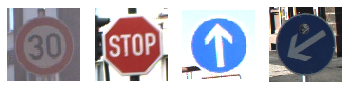

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('1/00001_00000_00012.png')
plt.subplot(141)
plt.imshow(img1)
plt.axis('off')
plt.subplot(142)
img2 = mpimg.imread('2/00014_00001_00019.png')
plt.imshow(img2)
plt.axis('off')
plt.subplot(143)
img3 = mpimg.imread('3/00035_00008_00023.png')
plt.imshow(img3)
plt.axis('off')
plt.subplot(144)
img4 = mpimg.imread('4/00039_00000_00029.png')
plt.imshow(img4)
plt.axis('off')
plt.show()

### Question 1 (10pts).  In this exercise, you need to build and train a convolutional neural network to discriminate between the four images.  

- Before building the network, you should start by cropping the images so that they all have a common predefined size (take the smallest size across all images) 

- We will use a __Sequential model__ from Keras but it will be up top you to define the structure of the convolution net. Initialization of the sequential model can be done with the following line 

model = Sequential()



#### 1.a. Convolutions. 

- We will defintely use __convolutional layers__. you can add such layers to the model by using the lines 

        model.add(Conv2D(num_units, (filter_size1, filter_size2), padding='same',
                             input_shape=(3, IMG_SIZE, IMG_SIZE),
                             activation='relu'))
                     
for the first layer and                     

        model.add(Conv2D(filters, filter_size, activation, input_shape)

for all the others. 'filters' indicate the number of filters you want to use in the convolutional layer. filter_size is the size of each filter and activation is the usual activation that comes on top of the convolution, i.e.
$x_{\text{out}} = \sigma(\text{filter}*\text{input})$. Finally input_shape indicates the size of your input. Note that only the input layer should be given the input size. Subsequent layers will automatically compute the size of their inputs based on previous layers. 

#### 1.b Pooling Layers 


On top of the convolutional layers, convolutional neural networks (CNN) also often rely on __Pooling layers__. The addition of such a  layer can be done through the following line 

        model.add(MaxPooling2D(pool_size=(filter_sz1, filter_sz2)))

The _pooling layers_ usually come with two parameters: the 'pool size' and the 'stride' parameter. The basic choice for the pool size is (2,2) and the stride is usually set to None (which means it will split the image into non overlapping regions such as in the Figure below). You should however feel free to play a little with those parameters. The __MaxPool operator__ considers a mask of size pool_size which is slided over the image by a number of pixels equal to the stride parameters (in x and y, there are hence two translation parameters). for each position of the mask, the output only retains the max of the pixels appearing in the mask (This idea is illustrated below). One way to understand the effect of the pooling operator is that if the filter detects an edge in a subregion of the image (thus returning at least one large value), although a MaxPooling will reduce the number of parameters, it will keep track of this information.    

Adding 'Maxpooling' layers is known to work well in practice. 

<img src="Maxpool.png" width=600/> 

Although it is a little bit up to you to decide how you want to structure the network, a good start is to add a couple (definitely not exceeding 4) combinations (convolution, convolution, Pooling) with increasing number of units (you do every power of two like 16, 32, 128,...). 

#### 1.c. Flattening and Fully connected layers

Once you have stacked the convolutional and pooling layers, you should flatten the output through a line of the form

        model.add(Flatten())

And add a couple (no need to put more than 2,3) dense fully connected layers through lines of the form

        model.add(Dense(num_units, activation='relu'))



#### 1.d. Concluding 

Since there are four possible signs, you need to __finish your network with a dense layer with 4 units__. Each of those units should output four number between 0 and 1 representing the likelihood that any of the four sign is detected and such that $p_1 + p_2 + p_3 + p_4 = 1$ (hopefully with one probability much larger than the others). For this reason, a good choice for the __final activation function__ of those four units is the __softmax__ (Why?). 


Build your model below. 

In [30]:
img1.shape

(65, 65, 3)

In [31]:
# Cropping images to the size of smallest one
from PIL import Image
import os
from tqdm import tqdm

min_width = 10^5
min_height = 10^5

for i in range(1, 5):
    for filename in tqdm(os.listdir(str(i))): # tqdm to have an idea how long should we wait
        im = Image.open(str(i) + "/" + filename)
        width, height = im.size   # Get dimensions
        if width < min_width:
            min_width = width
        if height < min_height:
            min_height = height

print(min_width, min_height)

100%|██████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 9704.02it/s]

15 15


In [32]:
# Cropping images on center with size min_width x min_height
import numpy as np
import math

X = []
y = []

for i in range(1, 5):
    for filename in tqdm(os.listdir(str(i))): # tqdm to have an idea how long should we wait
        im = Image.open(str(i) + "/" + filename)
        width, height = im.size  
        left = math.floor((width - min_width)/2)
        top = math.floor((height - min_height)/2)

        right = left + min_width
        bottom = top + min_width # Ensure that we have proper 15 x 15 images
        
        
        
        # Crop the center of the image
        im = im.crop((left, top, right, bottom))
        
        X.append(np.array(im))
        y.append(i)
# Forming dataset

100%|██████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 3497.56it/s]


In [33]:
X[0].shape

(15, 15, 3)

In [34]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from tensorflow.compat.v1 import disable_eager_execution
disable_eager_execution() # Compatibility and performance issue

IMG_SIZE = X[0].shape[1]

model = Sequential()
model.add(Conv2D(10, 2, padding='same',
                   input_shape=(IMG_SIZE, IMG_SIZE, 3),
                   activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(4, activation='softmax'))

# construct the model using convolutional layers, dense fully connected layers and 


### Question 2 (3pts). Setting up the optimizer

Once you found a good architecture for your network, split the dataset, by retaining about 90% of the images for training and 10% of each folder for test. To train your network in Keras, we need two more steps. The first step is to set up the optimizer. Here again it is a little bit up to you to decide how you want to set up the optimization. Two popular approaches are __SGD and ADAM__. You will get to choose the learning rate. This rate should however be between 1e-3 and 1e-2. Once you have set up the optimizer, we need to set up the optimization parameters. This includes the loss (we will take it to be the __categorical cross entropy__ which is the extension of the log loss to the multiclass problem).

In [35]:
from tensorflow.python.keras.optimizers import adam

# set up the optimize here
# Myoptimizer = SGD
Myoptimizer = adam(lr=0.001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=Myoptimizer,
              metrics=['accuracy'])

### Question 3 (2pts). Optimization

The last step is to fit the network to your data. Just as any other function in scikit-learn, we use a call to the function 'fit'. The training of neural networks can be done by splitting the dataset into minibatches and using a different batch at each SGD step. This process is repeated over the whole dataset. A complete screening of the dataset is called an epoch. We can then repeat this idea several times. In keras the number of epochs is stored in the 'epochs' parameter and the batch size is stored in the 'batch_size'.   

In [36]:
from sklearn.utils import shuffle
X, y = shuffle(X, y) # randomly shuffle dataset
y = np.array(y) - 1 # we need to substract 1 in order to receive proper categorical representation below

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.1) # Stratified splitting

In [38]:
values, counts = np.unique(y_train, return_counts=True)
print(counts)
values, counts = np.unique(y_test, return_counts=True)
print(counts)

[1998  702 1080  270]
[222  78 120  30]


In [39]:
from keras.utils import to_categorical
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [40]:
from tensorflow.keras.callbacks import EarlyStopping
batch_size = 32
epochs = 30

callbacks = [
    EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 5 epochs"
        patience=10,
        verbose=1
    )
]


model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks=callbacks)

Train on 3240 samples, validate on 810 samples
Epoch 1/30
3240/3240 [==============================] - 0s 146us/sample - loss: 9.7197 - acc: 0.7926 - val_loss: 1.0270 - val_acc: 0.9123
Epoch 2/30
3240/3240 [==============================] - 0s 95us/sample - loss: 0.6343 - acc: 0.9395 - val_loss: 0.6258 - val_acc: 0.9395
Epoch 3/30
3240/3240 [==============================] - 0s 91us/sample - loss: 0.4618 - acc: 0.9543 - val_loss: 0.2586 - val_acc: 0.9778
Epoch 4/30
3240/3240 [==============================] - 0s 103us/sample - loss: 0.2758 - acc: 0.9648 - val_loss: 0.2594 - val_acc: 0.9704
Epoch 5/30
3240/3240 [==============================] - 0s 95us/sample - loss: 0.2199 - acc: 0.9735 - val_loss: 0.4043 - val_acc: 0.9667
Epoch 6/30
3240/3240 [==============================] - 0s 96us/sample - loss: 0.2367 - acc: 0.9698 - val_loss: 0.5539 - val_acc: 0.9481
Epoch 7/30
3240/3240 [==============================] - 0s 98us/sample - loss: 0.1858 - acc: 0.9762 - val_loss: 0.4985 - val_acc:

In [41]:
results = model.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)

450/450 [==============================] - 0s 18us/sample - loss: 0.1731 - acc: 0.9844
test loss, test acc: [0.17314037501811982, 0.98444444]


In [42]:
results = model.predict(X_test)
np.argmax(results, axis=1)

array([2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 3, 2, 1, 0, 1, 1,
       1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 3, 2, 0, 2, 0, 3,
       1, 0, 3, 1, 0, 0, 3, 1, 2, 3, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 3, 3, 0, 2, 2, 2, 1, 2, 0, 0, 0, 3,
       2, 2, 0, 0, 0, 3, 2, 0, 2, 0, 1, 0, 0, 3, 0, 2, 1, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2,
       2, 1, 2, 3, 0, 0, 0, 0, 0, 3, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 3, 0, 0, 0,
       2, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 3, 1, 0, 0, 1, 2, 0, 2, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 2, 2,
       1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 1, 1, 3, 1, 2, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 3, 2, 2,
       2, 1, 3, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0,

In [43]:
np.argmax(y_test, axis=1)

array([2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 2, 3, 2, 1, 0, 1, 1,
       1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 3, 0, 2, 2, 0, 0, 2, 0, 0, 2, 3, 2, 0, 2, 0, 3,
       1, 0, 3, 1, 0, 0, 3, 1, 2, 3, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 3, 3, 0, 2, 2, 2, 1, 2, 0, 0, 0, 3,
       2, 2, 0, 0, 0, 3, 2, 0, 2, 0, 1, 0, 0, 3, 0, 2, 1, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2,
       2, 1, 2, 3, 0, 0, 0, 0, 0, 3, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 3, 0, 0, 0,
       2, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 3, 1, 0, 0, 1, 2, 0, 2, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 2, 2,
       1, 0, 0, 2, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 0, 1, 1, 3, 1, 2, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 3, 2, 2,
       2, 1, 3, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0,